# Analysis of IPC thresholds at a national level
This notebook examines the conditions under which the trigger mechanism threshold of 20% of the population or more in or above IPC Phase 3 was reached in Somalia.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

import ipc_pop_data as ipd

In [2]:
input_file = 'IPC Population Figures Tracking Sheet.xlsx'
country = "Somalia"
somalia_ipc = ipd.xl_pop_sheet_extract(input_file, country)

In [3]:
somalia_ipc.columns

Index(['country', 'pop', 'date', 'dt-str', 'rev_pop', '%pop', 'period',
       'period-str', 'IPC1-pop', 'IPC1-%rev_pop', 'IPC2-pop', 'IPC2-%rev_pop',
       'IPC3-pop', 'IPC3-%rev_pop', 'IPC4-pop', 'IPC4-%rev_pop', 'IPC5-pop',
       'IPC5-%rev_pop', 'IPC3>-pop', 'IPC3>-%rev_pop', 'P-st-period',
       'P-st-period-str', 'P-end-period', 'P-end-period-str', 'P-IPC1-pop',
       'P-IPC1-%rev_pop', 'P-IPC2-pop', 'P-IPC2-%rev_pop', 'P-IPC3-pop',
       'P-IPC3-%rev_pop', 'P-IPC4-pop', 'P-IPC4-%rev_pop', 'P-IPC5-pop',
       'P-IPC5-%rev_pop', 'P-IPC3>-pop', 'P-IPC3>-%rev_pop'],
      dtype='object')

In [4]:
(somalia_ipc['P-IPC3>-pop']-somalia_ipc['IPC3>-pop'])/somalia_ipc['IPC3>-pop']

211     0.749373
212     0.367634
213    -0.117044
214     0.657351
215   -0.0504532
216      0.77129
217     0.167008
218     0.194134
219   -0.0266312
220     -0.13575
221     0.421227
dtype: object

In [5]:
# Threshold analysis NEW
def find_first_threshold(row):
    if row['P-IPC3>-pop'] > 5000000:
        return 1
    elif row['P-IPC3>-%rev_pop'] >= 0.2:
    #elif row['P-IPC3>-pop']/row['pop'] >= 0.2: # Here, we have selected pop, instead of 'rev pop' (reviewed population)
        return 1
    else:
        return 0

def find_second_threshold(row):
    delta = (row['P-IPC3>-pop']-row['IPC3>-pop'])/row['IPC3>-pop']
    if delta >= 0.05:
        return 1
    else:
        return 0
    
def find_third_threshold(row):
    projected = row['P-IPC4-%rev_pop'] + row['P-IPC5-%rev_pop']
    if projected >= 0.025:
        return 1
    else:
        return 0

def get_threshold_reached(row):
    if row['option_1'] == 0:
        return 0
    elif row['option_2'] + row['option_3'] >= 1:
        return 1
    else:
        return 0
    
somalia_ipc['option_1'] = somalia_ipc.apply(lambda x: find_first_threshold(x), axis=1)
somalia_ipc['option_2'] = somalia_ipc.apply(lambda x: find_second_threshold(x), axis=1)
somalia_ipc['option_3'] = somalia_ipc.apply(lambda x: find_third_threshold(x), axis=1)
somalia_ipc['threshold_reached'] = somalia_ipc.apply(lambda x: get_threshold_reached(x), axis=1)

# Data
Below is a sample of the imported data table, converted from the IPC Population Figures Tracking Sheet. 

In [6]:
somalia_ipc[['country', 'pop', 'rev_pop', '%pop', 'period', 'IPC3-pop', 'IPC4-pop', 'IPC3>-pop', 'IPC5-pop', 'P-st-period', 'P-end-period',
            'P-IPC3-pop', 'P-IPC4-pop', 'P-IPC3>-pop', 'P-IPC5-pop']]

,country,pop,rev_pop,%pop,period,IPC3-pop,IPC4-pop,IPC3>-pop,IPC5-pop,P-st-period,P-end-period,P-IPC3-pop,P-IPC4-pop,P-IPC3>-pop,P-IPC5-pop
211,Somalia,15443000.0,12327529.0,0.798260,2019-08-01 00:00:00,982000,215000,1197000,0,2019-10-01,2019-12-01,1655000,439000,2094000,0
212,Somalia,15443000.0,12327530.0,0.798260,2019-01-01 00:00:00,1045000,92000,1137000,0,2019-02-01,2019-06-01,1416000,139000,1555000,0
213,Somalia,13908000.0,12327530.0,0.886363,2018-07-01 00:00:00,1636262,115453,1768846,17131,2018-08-01,2018-12-01,1388045,156637,1561813,17131
214,Somalia,13908000.0,12327529.0,0.886362,2018-01-01 00:00:00,1466000,180000,1646000,0,2018-02-01,2018-06-01,2232000,496000,2728000,0
215,Somalia,13908000.0,12327529.0,0.886362,2017-07-01 00:00:00,2444000,866000,3310000,0,2017-08-01,2017-12-01,2341000,802000,3143000,0
216,Somalia,12327529.0,12327529.0,1.000000,2017-01-01 00:00:00,1561000,83000,1644000,0,2017-02-01,2017-06-01,2473000,439000,2912000,0
217,Somalia,13908000.0,12327529.0,0.886362,2016-07-01 00:00:00,948000,28000,976000,0,2016-08-01,2016-12-01,1096000,43000,1139000,0
218,Somalia,13908000.0,7502654.0,0.539449,2015-07-01 00:00:00,655000,61000,716000,0,2015-08-01,2015-12-01,794000,61000,855000,0
219,Somalia,13908000.0,7502654.0,0.539449,2015-01-01 00:00:00,717000,34000,751000,0,2015-02-01,2015-06-01,697000,34000,731000,0
220,Somalia,13908000.0,7502654.0,0.539449,2014-07-01 00:00:00,1114000,72000,1186000,0,2014-08-01,2014-12-01,967000,58000,1025000,0


In [7]:
pd.options.display.width = 0
somalia_ipc.loc[somalia_ipc['P-st-period']=='2016-08-01']

,country,pop,date,dt-str,rev_pop,%pop,period,period-str,IPC1-pop,IPC1-%rev_pop,...,P-IPC4-pop,P-IPC4-%rev_pop,P-IPC5-pop,P-IPC5-%rev_pop,P-IPC3>-pop,P-IPC3>-%rev_pop,option_1,option_2,option_3,threshold_reached
217,Somalia,13908000.0,2016-06-01,2016-06-01,12327529.0,0.886362,2016-07-01 00:00:00,2016-07-01,7741529,0.627987,...,43000,0.00348813,0,0,1139000,0.0923948,0,1,0,0


## Thresholds
According to the actual data collected, the threshold was reached in July 2017. However, the thresholds were triggered by projections for two periods - February 2017 to June 2017 and August 2017 to December 2017.

In [8]:
# Print dates when CERF threshold reached of 20% of total population (as opposed to reviewed population)
#threshold = somalia_ipc.loc[somalia_ipc['IPC3>-pop']/somalia_ipc['pop'] >= 0.2]
#print("Actual threshold reached")
#print(threshold['period'])

In [9]:
# threshold reached
proj_threshold = somalia_ipc.loc[somalia_ipc['threshold_reached']==1]
print("Projected threshold reached")
print(proj_threshold[['date', 'period', 'P-st-period', 'P-end-period']])

Projected threshold reached
          date               period P-st-period P-end-period
214 2018-01-01  2018-01-01 00:00:00  2018-02-01   2018-06-01
215 2017-08-01  2017-07-01 00:00:00  2017-08-01   2017-12-01
216 2017-01-01  2017-01-01 00:00:00  2017-02-01   2017-06-01


In [10]:
# Find projected thresholds, if any
#proj_threshold = somalia_ipc.loc[somalia_ipc['P-IPC3>-pop']/somalia_ipc['pop'] >= 0.2]
#print("Projected threshold reached")
#print(proj_threshold[['P-st-period', 'P-end-period']])

## Timeseries
The plot below shows the actual and projected IPC phases in Somalia from 2014 to the end of 2019, along with the periods during which the advance funding mechanism would have been triggered. The projected thresholds are shown in grey, and actual threshold is shown in red.

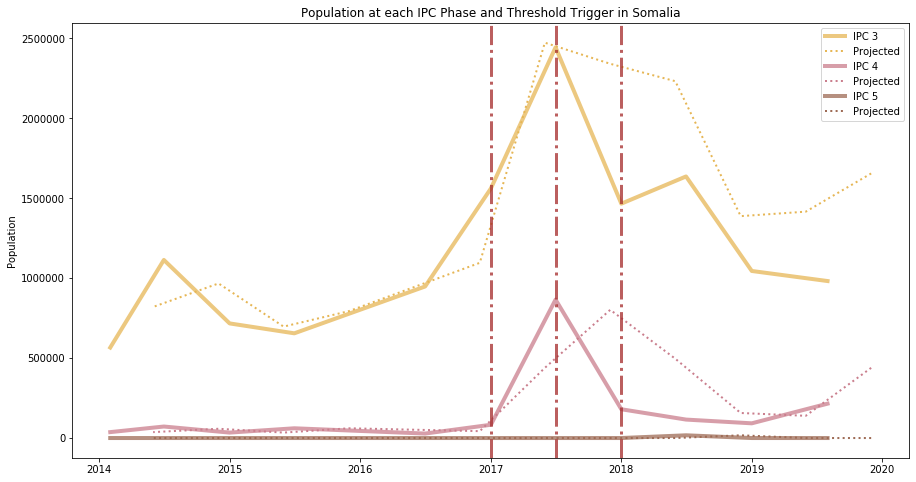

In [11]:
ipd.line_chart(somalia_ipc, [False, False, True, True, True])

## Next steps
1. Can the accuracy of the projections be improved by using external indicators, such as World Food Prices or WSRI?
2. How often were the thresholds predicted at a sub-national level?

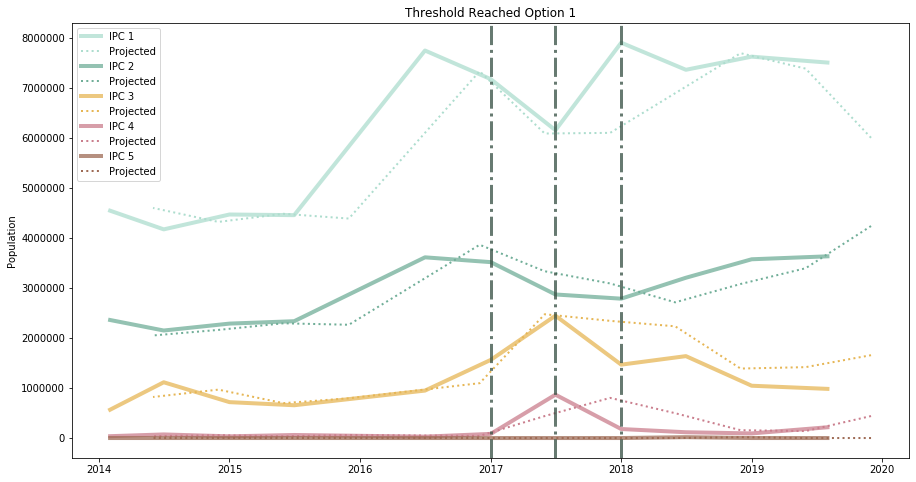

In [12]:
ipd.line_chart(somalia_ipc, ipc_list=[True, True, True, True, True], option=1, title="Threshold Reached Option 1")

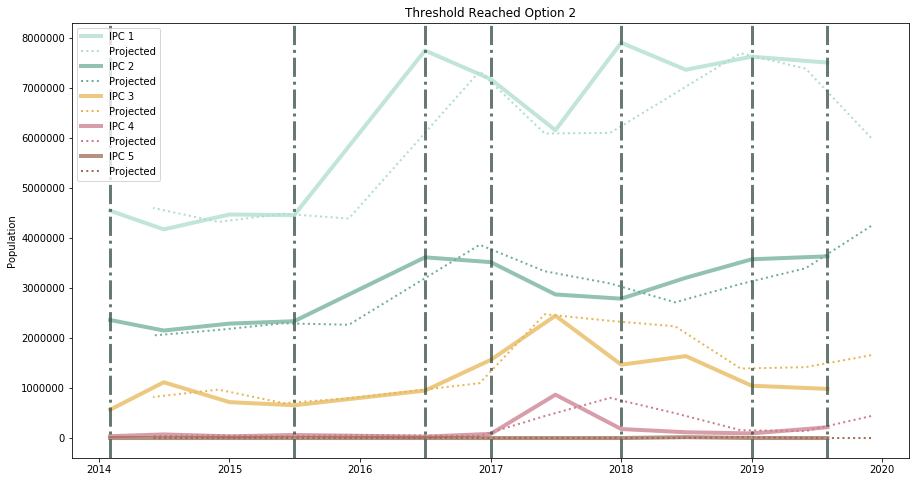

In [13]:
ipd.line_chart(somalia_ipc, ipc_list=[True, True, True, True, True], option=2, title="Threshold Reached Option 2")

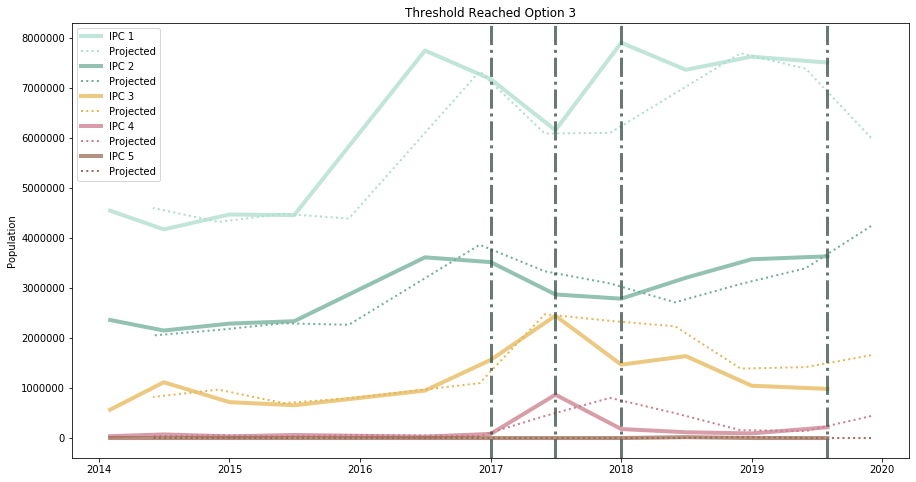

In [14]:
ipd.line_chart(somalia_ipc, ipc_list=[True, True, True, True, True], option=3, title="Threshold Reached Option 3")

In [20]:
cerf_data = pd.read_csv('CERF allocations 2014-2020.csv')
cerf_data['Date of Last Project Disbursement'] = pd.to_datetime(cerf_data['Date of Last Project Disbursement'], format='%d-%m-%Y')


In [21]:
cerf_data.head()

,Projects,Application Code,Country,Window,Emergency Type,Year,Application Title,Date of Concept/Strategy,Date of Original Submission,Date Summary RC/HC Email Sent,Date of Earliest Project Start,Date of Last Project Disbursement,Amount Approved,Application Summary
0,nan,19-RR-SOM-38014,Somalia,RR,Drought,2019,Somalia RR Application Jul 2019 (drought),nan,43669,43697.00,43647,2019-08-19,29922589,Six out of seven rainy seasons have been poor ...
1,nan,19-RR-SOM-34946,Somalia,RR,Drought,2019,Somalia RR Application Mar 2019 (Drought),43509.00,43539,43565.00,43525,2019-04-11,11946861,Despite some improvements in the overall human...
2,nan,18-RR-SOM-28714,Somalia,RR,Drought,2018,Somalia RR Application Mar 2018 (Drought),43151.00,43180,43202.00,43160,2018-04-18,12135443,Despite the early and massive scale up of huma...
3,nan,17-RR-SOM-25392,Somalia,RR,Drought,2017,Somalia RR Application Apr 2017 (Drought),42810.00,42837,42858.00,42821,2017-05-10,15033541,The humanitarian situation in Somalia is rapid...
4,nan,16-RR-SOM-19262,Somalia,RR,Drought,2016,"Somalia RR Application, Mar 2016 (El Niño)",nan,42439,42466.95,42429,2016-04-13,11006301,The effects of El Niño on Somalia were mixed w...


No handles with labels found to put in legend.


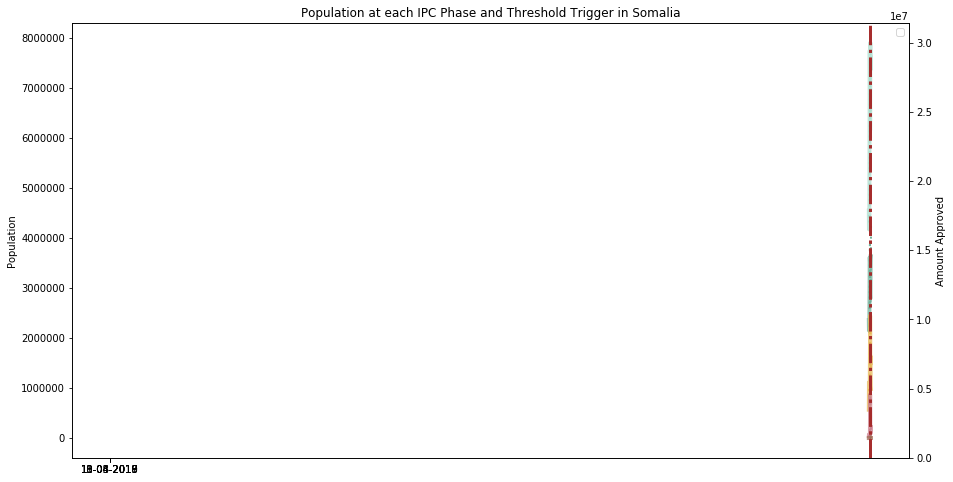

In [22]:
ipd.line_chart(somalia_ipc, ipc_list=[True, True, True, True, True], cerf=True)

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)

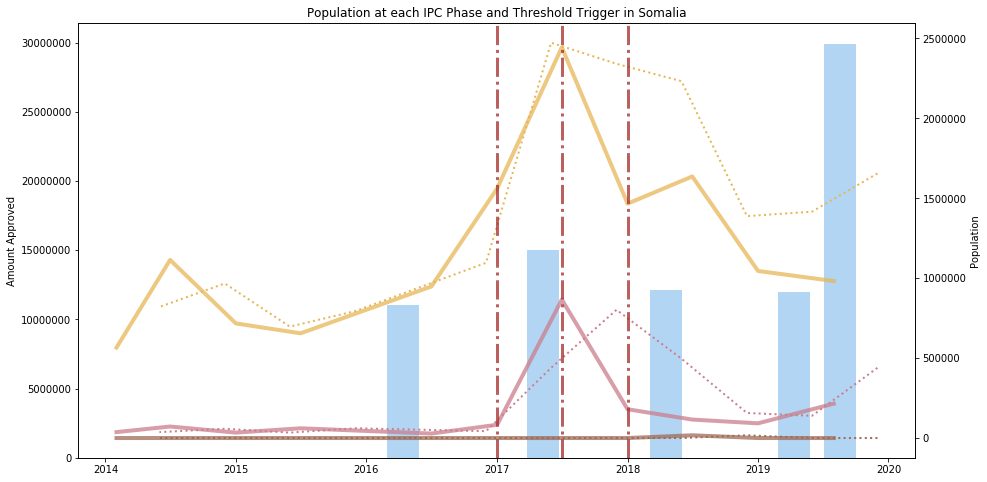

In [44]:
threshold = somalia_ipc.loc[somalia_ipc['threshold_reached']==1]
figure(figsize=(15, 8))

plt.bar(cerf_data['Date of Last Project Disbursement'], cerf_data['Amount Approved'], width=90, color='#0074D9',
        alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Amount Approved")
plt.twinx()
plt.plot(somalia_ipc['period'], somalia_ipc['IPC3-pop'], label='IPC 3',
                 alpha=0.75, color='#E6B655', linestyle='-', linewidth=4)
plt.plot(somalia_ipc['P-end-period'], somalia_ipc['P-IPC3-pop'], color='#E6B655',
                 label='Projected', linestyle=':', linewidth=2)
plt.plot(somalia_ipc['period'], somalia_ipc['IPC4-pop'], label='IPC 4',
                 alpha=0.75, color='#CA7E8D', linestyle='-', linewidth=4)
plt.plot(somalia_ipc['P-end-period'], somalia_ipc['P-IPC4-pop'], color='#CA7E8D',
                 label='Projected', linestyle=':', linewidth=2)
plt.plot(somalia_ipc['period'], somalia_ipc['IPC5-pop'], label='IPC 5',
                 alpha=0.75, color='#9E6B55', linestyle='-', linewidth=4)
plt.plot(somalia_ipc['P-end-period'], somalia_ipc['P-IPC5-pop'], color='#9E6B55',
                 label='Projected', linestyle=':', linewidth=2)
plt.ylabel("Population")
plt.title("Population at each IPC Phase and Threshold Trigger in Somalia")

for d in threshold['period']:
        plt.axvline(d, linewidth=3, linestyle='-.', color='brown', alpha=0.75)


